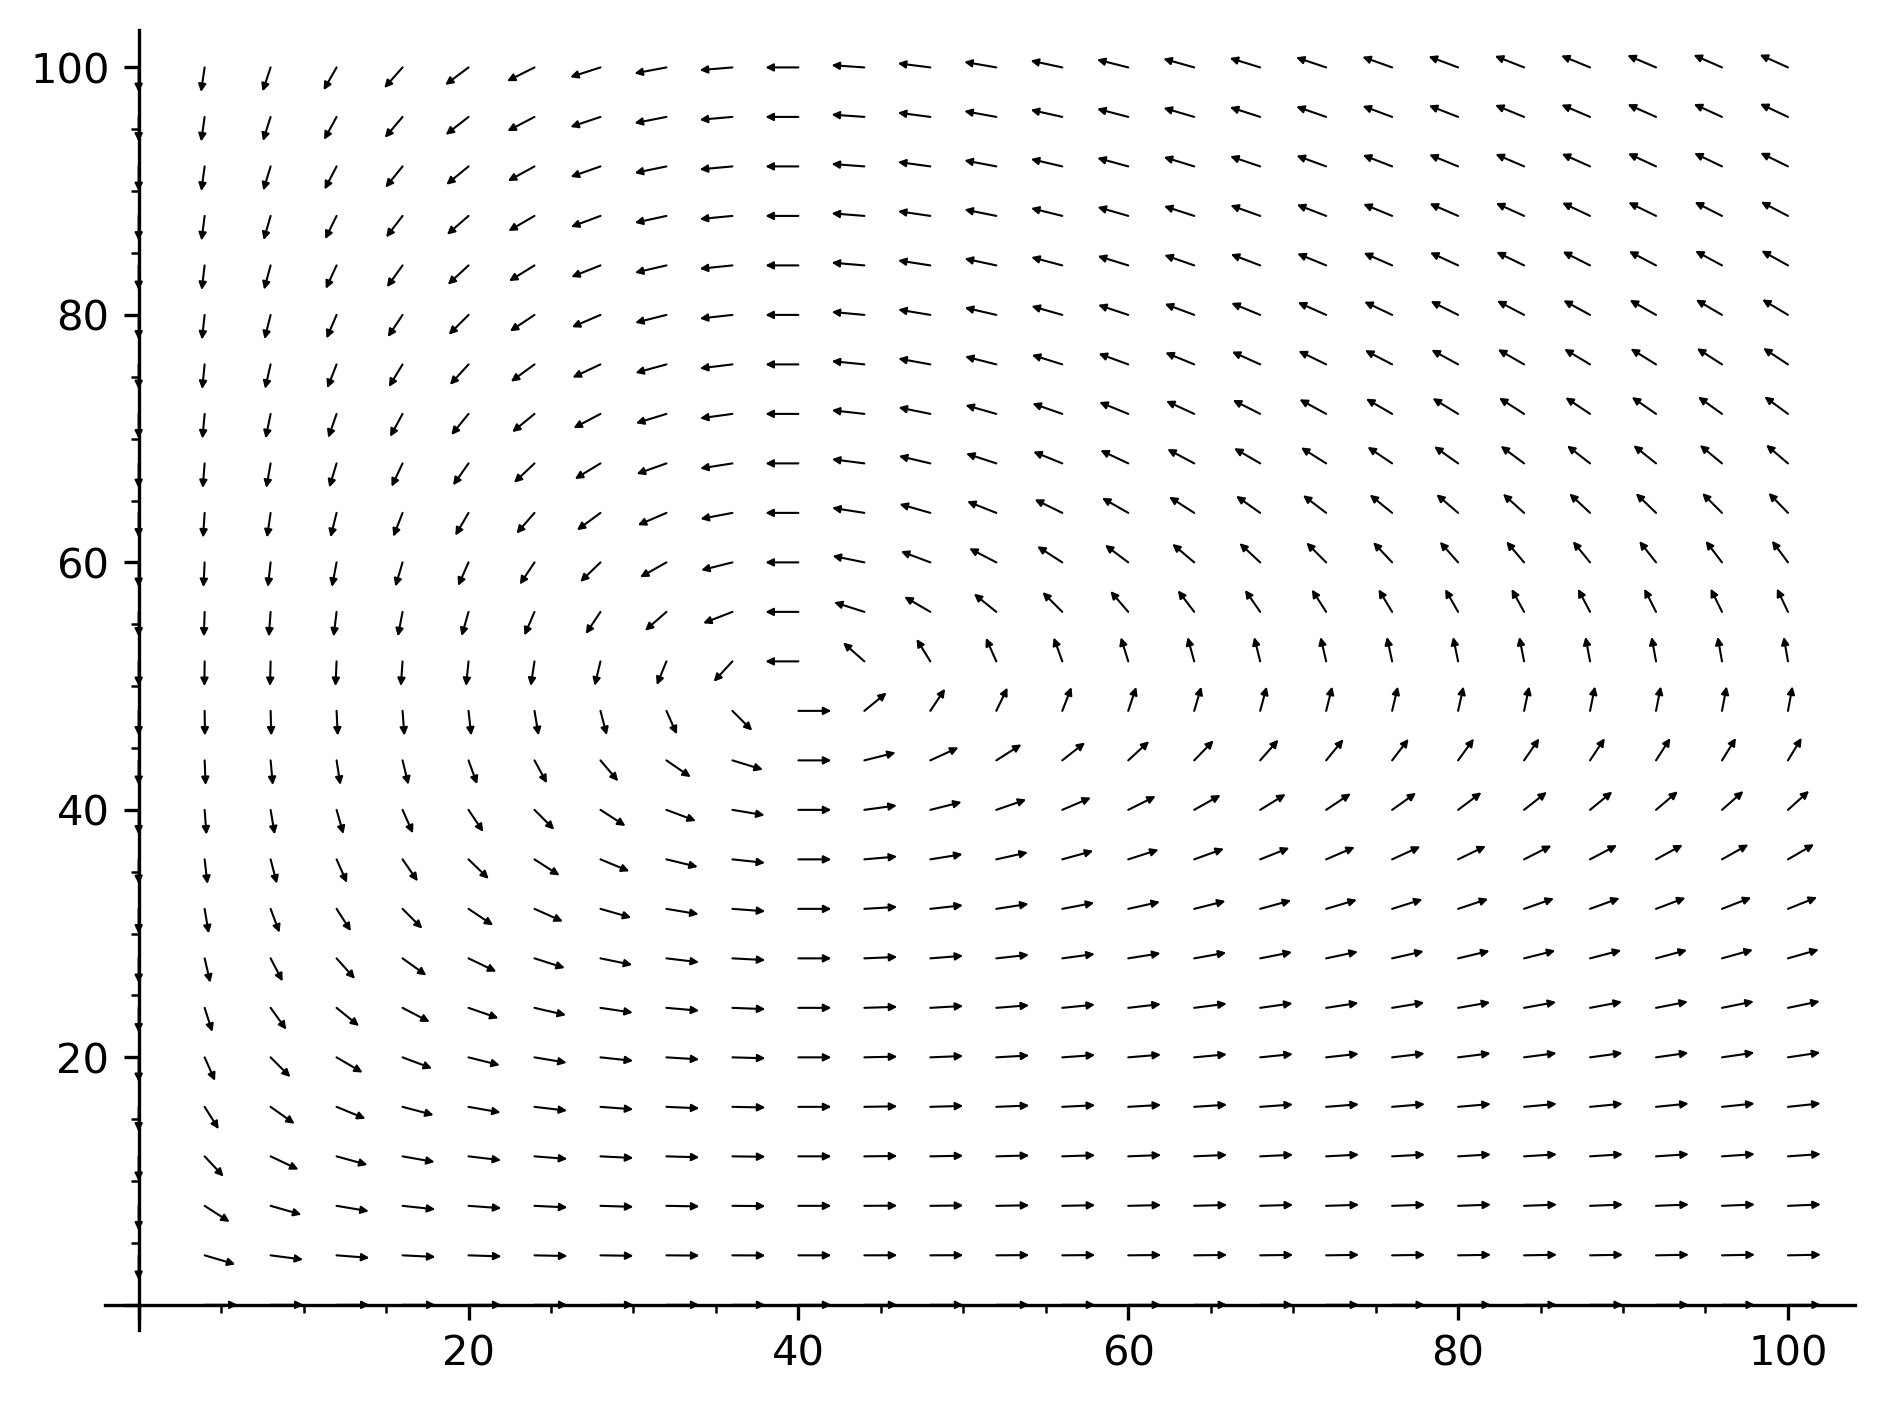

In [28]:
x_min = 0
x_max = 100
y_min = 0
y_max = 100
d = 2

# compute the change vector for Lokta-Volterra equations at (tuna, shark)
def tuna_shark(tuna, shark):
    dx = 0.5 * tuna - 0.01 * tuna * shark
    dy = 0.005 * tuna * shark - 0.2 * shark
    u = vector((dx, dy))
    return u

n = 25
dx = (x_max - x_min) / n
dy = (y_max - y_min) / n

G = Graphics()
for i in range(n+1):
    for j in range(n+1):
        u = vector([x_min + i*dx, y_min + j*dy])
        du = tuna_shark(*u)
        if du.norm() != 0:
            du = du / du.norm() * ((x_max - x_min) / n / 2)
            pass

        v = u + du
        G += arrow(u, v, arrowsize=0.75, width=0.5, color="black")

G.show(dpi=300)

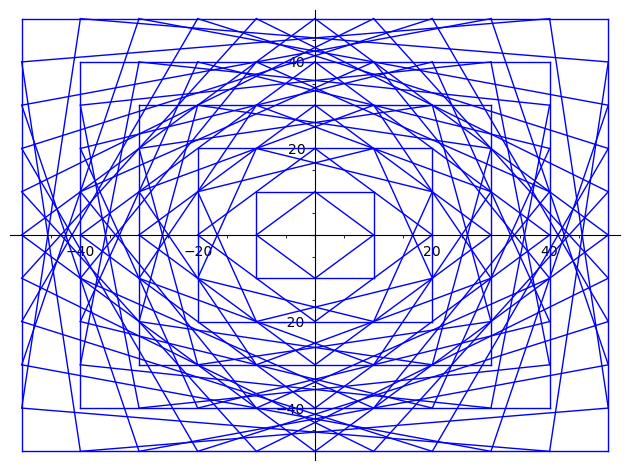

In [22]:
# from v to Av implies the vector should be Av - v
e1 = 2
v1 = vector([-1, 2])
e2 = 2
v2 = vector([ 1, 0])

D  = diagonal_matrix([e1, e2])
V  = matrix([ v1, v2 ]).transpose()

A = V*D*V.inverse()

theta = pi/2
A = matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
I = matrix([[1,0],[0,1]])
V = (A - I)

x_min = -50
x_max =  50
y_min = -50
y_max =  50

n = 10
dx = (x_max - x_min) / n
dy = (y_max - y_min) / n

G = Graphics()
u = vector([100,100])
for i in range(n+1):
    for j in range(n+1):
        u = vector([x_min + i*dx, y_min + j*dy])
        du = vector(V*u)
        if du.norm() != 0:
            # du = du / (du.norm())
            pass

        v = u + du
        G += line([u,v])
        # print(f"\\addplot[-{{Latex[round, length=2pt, width=1.5pt]}}] coordinates {{ ({float(u[0]):.2f},{float(u[1]):.2f}) ({float(v[0]):.2f},{float(v[1]):.2f}) }};")

G.show()

In [115]:
%%timeit -n1 -r1

def mult(A,B):
    assert A.dimensions() == B.dimensions()
    n, m = A.dimensions()
    assert n == m

    return matrix({
    (i,j): sum( A[i,k]*B[k,j] for k in range(n) )
    for i in range(n)
    for j in range(n)
    })

n = 100
M = MatrixSpace(ZZ, n, n)
A = M.random_element()
B = M.random_element()
mult(A,B)

166 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1

import random
n = 10000

# A and B are n-by-n matricies with random entries
A = [ [ random.random() for i in range(n) ] for j in range(n) ]
B = [ [ random.random() for i in range(n) ] for j in range(n) ]

# C = AB
C = [ [
        sum(A[i][k] * B[k][j] for k in range(n))
        for j in range(n)
    ]
    for i in range(n)
]